#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={"tested_positive": 1, "tested_negative": -1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

#### Plotando classificador

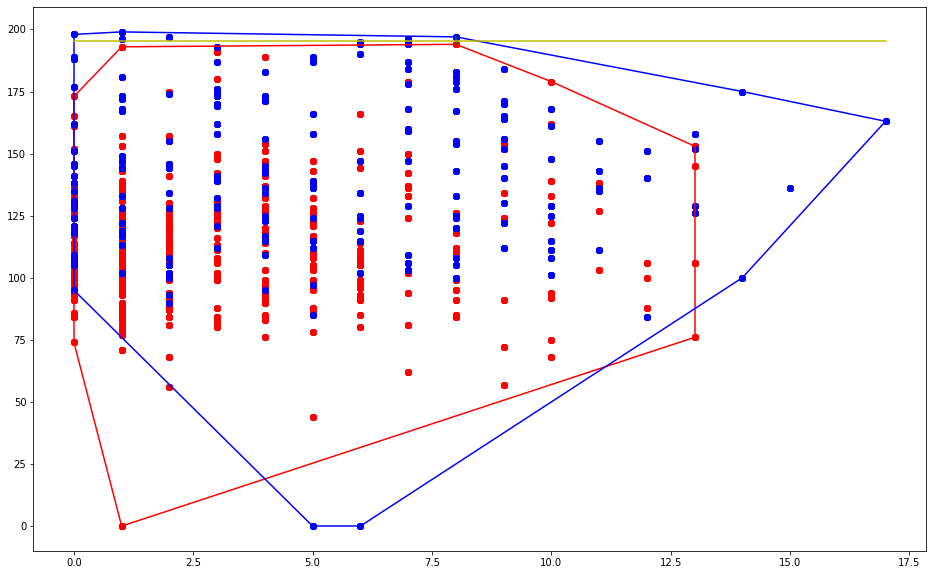

In [6]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,1.0,0.023810,1.0,0.616822
1,1.0,0.028571,1.0,0.682243
2,1.0,0.062500,1.0,0.719626
3,1.0,0.027027,1.0,0.663551
4,1.0,0.025000,1.0,0.635514


#### Resultados do teste

In [9]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.666667,0.02439,0.666667,0.649351


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [10]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

#### Plotando classificador

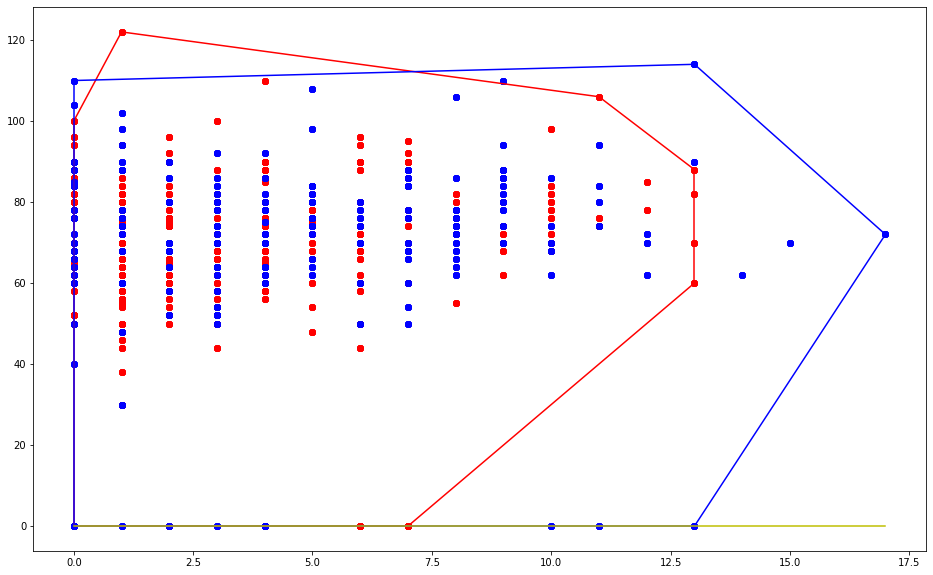

In [11]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [12]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [13]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.336449,1.0,0.336449,0.336449
1,0.448598,1.0,0.448598,0.448598
2,0.355140,1.0,0.355140,0.355140
3,0.336449,1.0,0.336449,0.336449
4,0.289720,1.0,0.289720,0.289720


#### Resultados do teste

In [14]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.337662,1.0,0.337662,0.337662


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [15]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

#### Plotando classificador

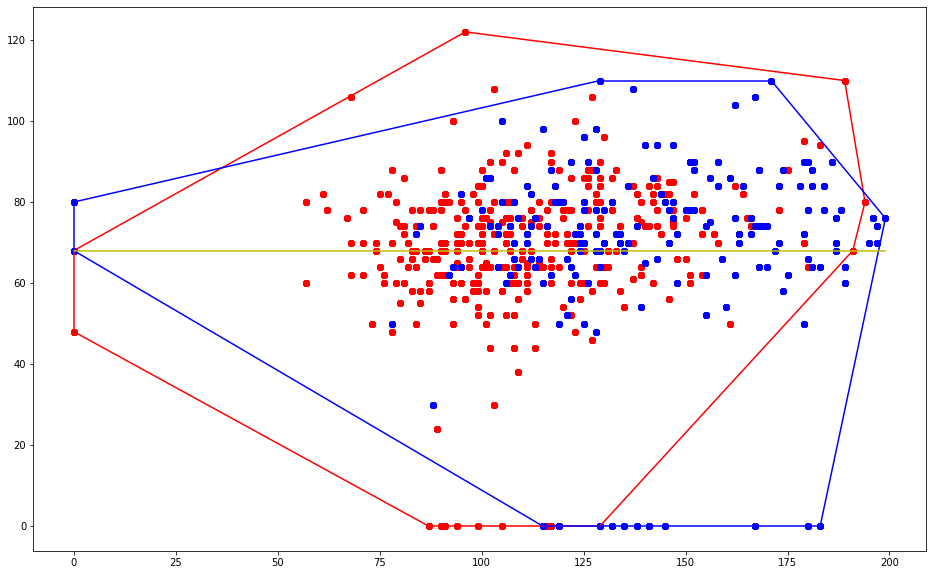

In [16]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [17]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [18]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.361905,1.000000,0.361905,0.373832
1,0.323810,0.971429,0.323810,0.327103
2,0.400000,1.000000,0.400000,0.411215
3,0.317308,0.970588,0.317308,0.327103
4,0.336449,1.000000,0.336449,0.336449


#### Resultados do teste

In [19]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.361233,1.0,0.361233,0.372294


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [20]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [21]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.625000,0.428571,0.625000,0.728972
1,0.545455,0.400000,0.545455,0.738318
2,0.739130,0.414634,0.739130,0.719626
3,0.666667,0.428571,0.666667,0.691589
4,0.653846,0.447368,0.653846,0.719626


#### Resultados do teste

In [22]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.875,0.432099,0.875,0.779221
